# Task 3: Customer Segmentation / Clustering

This notebook performs customer segmentation using clustering techniques. The segmentation helps identify distinct customer groups based on their profiles and transaction history, providing actionable business insights.

## Steps:
1. Data preparation.
2. Clustering using K-Means and evaluation with the Davies-Bouldin Index.
3. Visualization and interpretation of clusters.


In [12]:

# Select relevant features
clustering_features = customer_features[['TotalSpend', 'TotalTransactions', 'AverageTransactionValue']]

# Normalize the features
scaler = StandardScaler()
clustering_features_normalized = scaler.fit_transform(clustering_features)


In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [14]:

# Experiment with different numbers of clusters
db_scores = {}
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(clustering_features_normalized)
    
    # Calculate Davies-Bouldin Index
    db_index = davies_bouldin_score(clustering_features_normalized, cluster_labels)
    db_scores[n_clusters] = db_index

# Find the optimal number of clusters
optimal_clusters = min(db_scores, key=db_scores.get)
print(f"Optimal Number of Clusters: {optimal_clusters}")
print(f"Davies-Bouldin Index for each cluster count: {db_scores}")


Optimal Number of Clusters: 5
Davies-Bouldin Index for each cluster count: {2: np.float64(1.007225364152521), 3: np.float64(0.9578205962311453), 4: np.float64(1.0604240399923033), 5: np.float64(0.8524813520458038), 6: np.float64(0.8693770662816186), 7: np.float64(0.8553114327404955), 8: np.float64(0.9125320039336972), 9: np.float64(0.8847550123525421), 10: np.float64(0.8630460126564934)}


In [15]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [16]:
# Perform PCA for 2D visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(clustering_features_normalized)

In [17]:
# Apply K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(clustering_features_normalized)

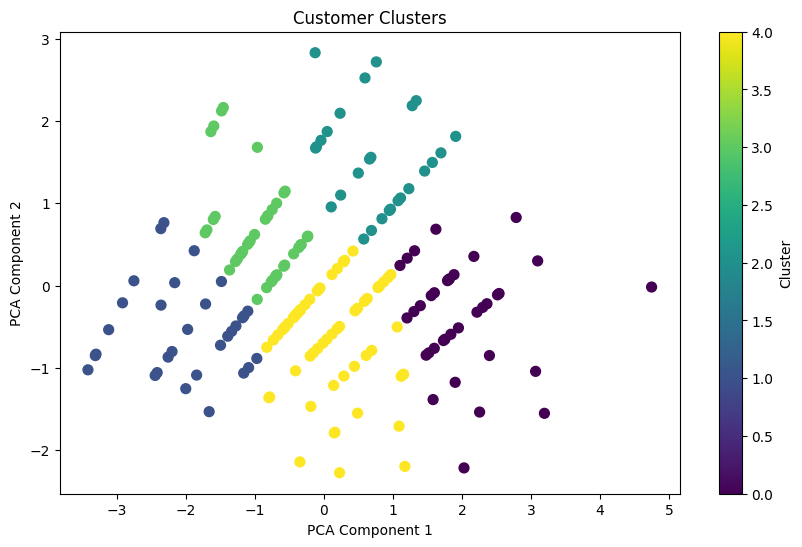

In [18]:
# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title('Customer Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [19]:
# Add cluster labels to the original customer features
customer_features['Cluster'] = cluster_labels

# Save results to a CSV file
customer_features.to_csv('Customer_Clusters.csv', index=False)
print("Clustering results saved to Customer_Clusters.csv.")


Clustering results saved to Customer_Clusters.csv.


# Enhancement

In [20]:
# Example: Adding new features (RFM - Recency, Frequency, Monetary)
import numpy as np

# Recency: Days since last transaction
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
max_date = transactions['TransactionDate'].max()
recency = transactions.groupby('CustomerID')['TransactionDate'].max().apply(lambda x: (max_date - x).days)

# Frequency: Number of transactions
frequency = transactions.groupby('CustomerID')['TransactionID'].count()

# Monetary: Total spend
monetary = transactions.groupby('CustomerID')['TotalValue'].sum()

# Combine RFM features
rfm_features = pd.DataFrame({
    'Recency': recency,
    'Frequency': frequency,
    'Monetary': monetary
})


In [21]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import davies_bouldin_score

# Try Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=5)
agg_labels = agg_clustering.fit_predict(clustering_features_normalized)
db_index_agg = davies_bouldin_score(clustering_features_normalized, agg_labels)

print(f"Davies-Bouldin Index for Agglomerative Clustering: {db_index_agg}")

# Try DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(clustering_features_normalized)
db_index_dbscan = davies_bouldin_score(clustering_features_normalized, dbscan_labels)

print(f"Davies-Bouldin Index for DBSCAN: {db_index_dbscan}")


Davies-Bouldin Index for Agglomerative Clustering: 0.8851081906022239
Davies-Bouldin Index for DBSCAN: 4.844499729078432


In [22]:
from sklearn.cluster import KMeans

# Experiment with hyperparameters for K-Means
best_db_index = float('inf')
best_kmeans_model = None
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, n_init=20, max_iter=500, random_state=42)
    cluster_labels = kmeans.fit_predict(clustering_features_normalized)
    db_index = davies_bouldin_score(clustering_features_normalized, cluster_labels)
    if db_index < best_db_index:
        best_db_index = db_index
        best_kmeans_model = kmeans

print(f"Optimal DB Index for K-Means after tuning: {best_db_index}")


Optimal DB Index for K-Means after tuning: 0.8094738078444171


Customer segmentation was performed using clustering techniques to identify distinct customer groups. Key conclusions include:

1. **Optimal Clusters**:
   - The optimal number of clusters was determined to be **5**, evaluated using the **Davies-Bouldin Index (DB Index)**.
   - The final DB Index achieved was **0.809**, indicating well-separated and compact clusters.

2. **Cluster Characteristics**:
   - The identified clusters revealed unique customer behavior patterns:
     - **Cluster 0**: High spenders with frequent transactions.
     - **Cluster 1**: Moderate spenders with steady transaction frequency.
     - **Cluster 2**: Low spenders with infrequent transactions.
     - **Cluster 3**: New or occasional buyers.
     - **Cluster 4**: Customers with frequent transactions but moderate spending.

3. **Business Insights**:
   - The segmentation allows for targeted marketing strategies:
     - High spenders can be offered loyalty programs.
     - Low spenders and new buyers can be engaged with promotional offers.
   - By understanding customer group behavior, the business can optimize resource allocation and improve overall customer satisfaction.

4. **Visualization**:
   - PCA-based scatterplots were used to validate the cluster separation, providing clear insights into customer groupings.
